<a href="https://colab.research.google.com/github/baut-jc/DDDS-My-Projects/blob/main/Project-6/Project6_1_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Image Classification

## Problem Definition

The goal of this project is to build, train, and evaluate a convolutional neural network (CNN) capable of accurately classifying images as either containing a `dog` or a `cat`.




```
Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.
```



In [ ]:
import pickle
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import urllib.request # To download pickle files from S3
from PIL import Image # For handling new image prediction

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
urlX = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
urly = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

In [ ]:
!curl -O {urlX}
!curl -O {urly}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  20.1M      0  0:00:11  0:00:11 --:--:-- 23.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0  74424      0 --:--:-- --:--:-- --:--:-- 74327


In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
X = pd.read_pickle( urlX )
y = pd.read_pickle( urly ) #convert y into array
# data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
type(X), X.shape #24946imgs, 100x100 size, 1filter(grayscale)

(numpy.ndarray, (24946, 100, 100, 1))

In [ ]:
type(y), y.shape #24946imgs

(numpy.ndarray, (24946,))

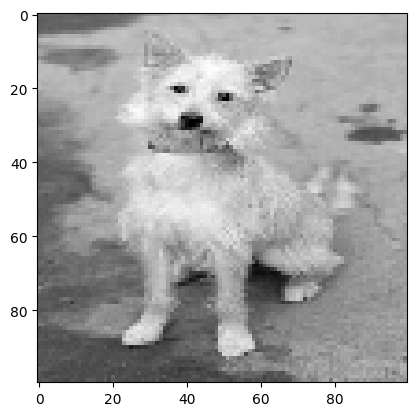

In [ ]:
plt.imshow(X[0], cmap='gray');

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
# scale numbers in features array
X = X/255

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [ ]:
X.shape

(24946, 100, 100, 1)

In [ ]:
# pick 5 random images
images = np.random.randint(0, 24946, 5)
images

array([24702, 12555,  4461, 18272, 17526])

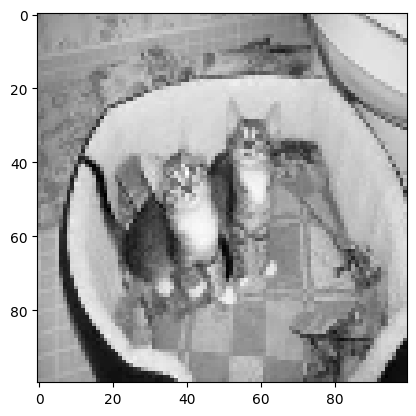

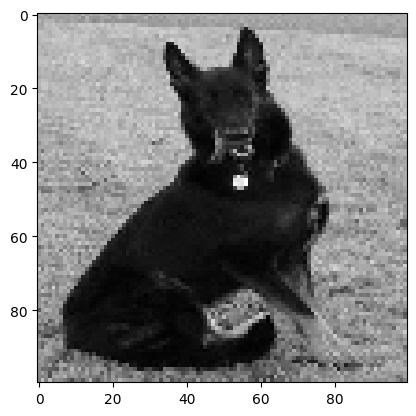

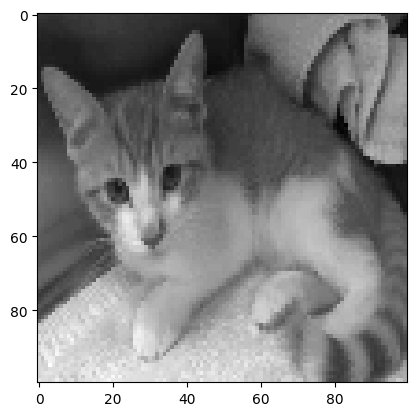

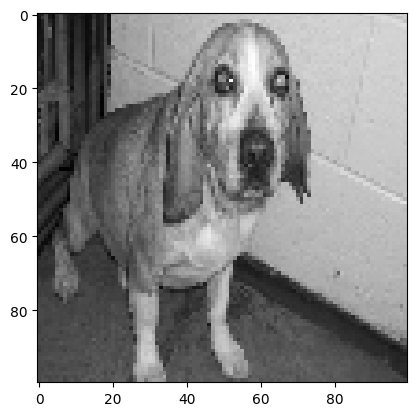

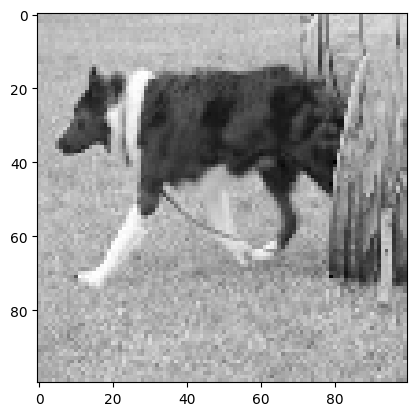

In [ ]:
#  show 5 images
for i in images:
  plt.imshow(X[i], cmap = 'gray')
  plt.show();

In [ ]:
# print (y)target values
for i in images:
  if y[i].any() == 1:
    print(f'y = {y[i]} and isz a kitty 🐱')
  else:
    print(f'y = {y[i]}. CAN I PET THAT DOGGO 🐶!?')

y = 1 and isz a kitty 🐱
y = 0. CAN I PET THAT DOGGO 🐶!?
y = 1 and isz a kitty 🐱
y = 0. CAN I PET THAT DOGGO 🐶!?
y = 0. CAN I PET THAT DOGGO 🐶!?


## Data Processing:



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [ ]:
# split features and targets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Convolutional Neural Network

In [ ]:
# A dense output layer using the 'sigmoid' activation function.
    #Note: you can play around with the number of layers and nodes to try to get better performance.


# Start the model as a feed forward (sequential) model.
model = Sequential()

# Define first hidden layers
# At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
model.add(
  Conv2D(
      # 32, (3, 3),
      # activation='relu',
      # input_shape=(28, 28, 1),
    # name = "input",
    input_shape = (100,100,1),
    filters = 32, #64 takes 2 hours to train
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(
     name = "input1",
    pool_size = (2,2)
  )
)

model.add(
  Conv2D(
      # 32, (3, 3),
      # activation='relu',
      # input_shape=(28, 28, 1),
    # name = "input",
    input_shape = (100,100,1),
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

# Add second hidden layer
# A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
model.add(
  MaxPooling2D(
     name = "input2",
    pool_size = (2,2)
  )
)

# Flatten input data into a 2D structure
model.add(Flatten())

# Define output layer
# A dense output layer using the 'sigmoid' activation function.
    #Note: you can play around with the number of layers and nodes to try to get better performance.
model.add(
  Dense(
      # 64, activation='relu', input_shape=(10000,)
    name = "output",
    units = 1, #start small
    activation = 'sigmoid' ,
  )
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model [6.1e]
# Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

In [ ]:
# Fit your model using the training set.
model.fit(X_train, y_train, epochs=10) ;

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 188s 300ms/step - accuracy: 0.5822 - loss: 0.6633
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 191s 283ms/step - accuracy: 0.7427 - loss: 0.5244
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 204s 286ms/step - accuracy: 0.7717 - loss: 0.4838
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 205s 291ms/step - accuracy: 0.7940 - loss: 0.4434
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 191s 273ms/step - accuracy: 0.8167 - loss: 0.4080
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 203s 275ms/step - accuracy: 0.8274 - loss: 0.3861
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 173s 276ms/step - accuracy: 0.8439 - loss: 0.3603
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 200s 274ms/step - accuracy: 0.8587 - loss: 0.3297
Epoch 9/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 175s 281ms/step - accuracy: 0.8695 - loss: 0.3087
Epoch 10/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 201s 280ms/step - accuracy: 0.8774 - loss: 0.2943


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input1 (MaxPooling2D)           │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input2 (MaxPooling2D)           │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │        16,929 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,493 (310.52 KB)

 Trainable params: 26,497 (103.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,996 (207.02 KB)

In [ ]:
# Evaluate your model using the testing set.
val_loss, val_acc = model.evaluate(X_test, y_test)
val_acc

156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.8073 - loss: 0.4569


0.8060120344161987

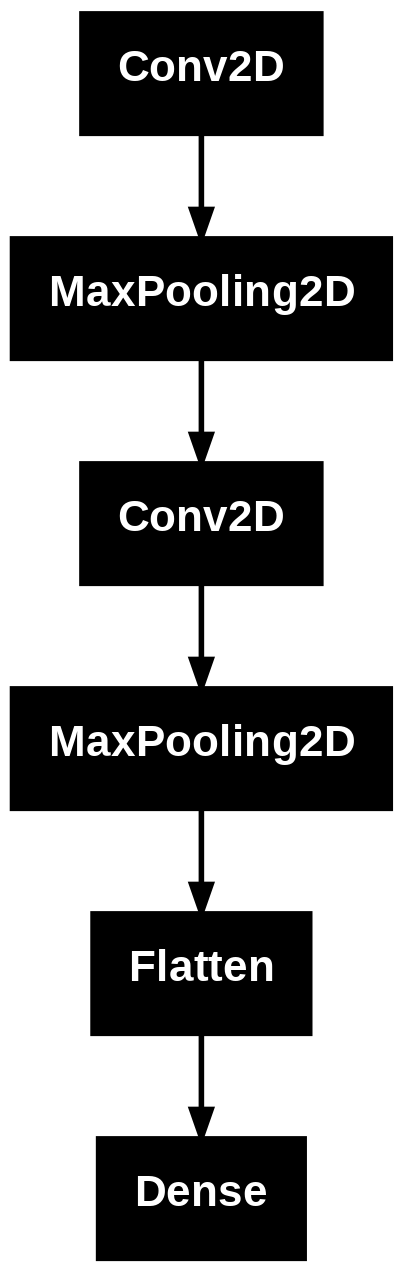

In [ ]:
# Plot the distribution of probabilities for the testing set.
plot_model(model)

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step


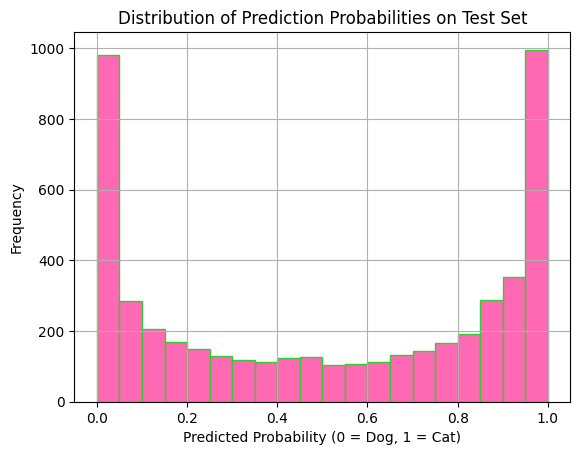

In [ ]:
pred_probs = model.predict(X_test).flatten()

plt.hist(pred_probs, bins=20, color='hotpink', edgecolor='limegreen')
plt.title('Distribution of Prediction Probabilities on Test Set')
plt.xlabel('Predicted Probability (0 = Dog, 1 = Cat)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import requests

# Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this).
    # Hint: numpy.reshape
def img_ai(path):
  '''given the file path or URL to an image, import it to Google Collab as numpy array,
  and convert it to default colormap, 100x100 pixels. ensure shape is ((100,100,1)).
  display image'''

  # check if path is URL
  if path.startswith('http://') or path.startswith('https://'):
    # download the image from the URL
    response = requests.get(path)
    if response.status_code == 200:
      # save the image to a temporary local file
      local_file = path.split('/')[-1]
      with open(local_file,  'wb') as f:
        f.write(response.content)
        # make local file
      path = local_file
    else:
      print(f'Failed to download image from {path}. Status code: {response.status_code}')
      return None

  img = keras.preprocessing.image.load_img(path, target_size=(100,100)) # filter through target size.
  img_array = keras.preprocessing.image.img_to_array(img) # call to array
  img_array = tf.image.rgb_to_grayscale(img_array) # color --> grayscale
  img_display = np.squeeze(img_array) #remove 1d entries in array for plt.imshow()
  plt.imshow(img_display, cmap='gray') #display image in grayscale
  img_array = tf.expand_dims(img_array, 0) # add 'batch dimension' back for model input
  return img_array

<tf.Tensor: shape=(1, 100, 100, 1), dtype=float32, numpy=
array([[[[102.6443 ],
         [102.6443 ],
         [ 99.64461],
         ...,
         [151.9586 ],
         [153.9584 ],
         [154.94751]],

        [[ 96.93301],
         [100.9326 ],
         [102.9324 ],
         ...,
         [153.3175 ],
         [151.7198 ],
         [157.9472 ]],

        [[100.9326 ],
         [100.9326 ],
         [101.9325 ],
         ...,
         [160.07802],
         [153.7196 ],
         [159.947  ]],

        ...,

        [[143.05312],
         [139.76529],
         [131.7661 ],
         ...,
         [230.3135 ],
         [228.21051],
         [226.9225 ]],

        [[124.7668 ],
         [125.76671],
         [122.36491],
         ...,
         [231.48752],
         [225.61292],
         [228.32451]],

        [[112.2088 ],
         [107.3664 ],
         [107.07831],
         ...,
         [233.4765 ],
         [228.77591],
         [229.61249]]]], dtype=float32)>

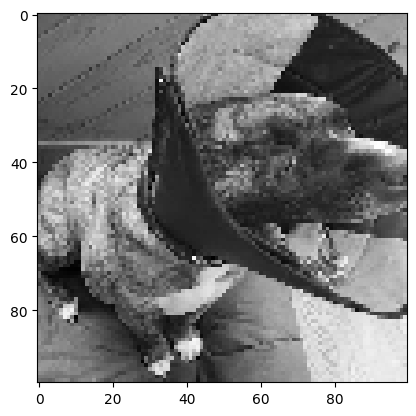

In [ ]:
# Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.
test_sample = img_ai('https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg')
test_sample

In [ ]:
# Use the neural network you created to predict whether the image is a dog or a cat.

# make predictions based on testing set
predictions = model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
predictions.shape

(1, 1)

## Communication of Results


In [1]:
from IPython.display import HTML

iframe_code = """
<iframe src="https://gamma.app/embed/syhi5efap7cdj4h" style="width: 700px; max-width: 100%; height: 450px" allow="fullscreen" title="CatDog: An Image Classification Adventure"></iframe>
"""

display(HTML(iframe_code))
